In [11]:
import requests
from bs4 import BeautifulSoup

import text_preprocessing as txt

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import re
import string
import math
import heapq

from functools import reduce
from collections import Counter

np.random.seed(1234)

In [12]:
pd.set_option('display.max_rows', 500)

## URL Import

In [41]:
def get_content(url):
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        content = " ".join(p.text for p in soup.find_all('p'))
        content = re.sub('\n+', ' ', content)
        return content
    except Exception as e:
        print(e)
        url = input("Enter URL again: ")
        return get_content(url)

In [42]:
url = input("Enter URL: ")

Enter URL: https://en.wikisource.org/wiki/Zuckerberg_Senate_Transcript_2018


In [46]:
content = get_content(url)

In [47]:
corpus = txt.sent_tokenizer(content)
words_in_corpus = [word for word in txt.word_tokenizer(content) if word not in txt.stops]

In [48]:
def is_word_present(test_word, text):
    """
    Function to test if 'test_word' is present in 'text'. 'text' can be a string or list.
    """
    try:
        print(text.index(test_word))
    except ValueError:
        print("Not in text")
        
is_word_present('life', words_in_corpus)

3747


## spaCy

In [56]:
doc = txt.nlp(content)

In [57]:
print([(X.text, X.label_) for X in doc.ents[:100]])

[('Transcript 2018 - Wikisource', 'PERSON'), ('Download Zuckerberg', 'PERSON'), ('2018', 'DATE'), ('Jump', 'PERSON'), ('Zuckerberg Senate', 'PERSON'), ('2018', 'DATE'), ('United States', 'ORG'), ('Senate', 'ORG'), ('2451391Zuckerberg', 'CARDINAL'), ('Senate', 'ORG'), ('Commerce', 'ORG'), ('Science and Transportation', 'ORG'), ('today', 'DATE'), ('GRASSLEY', 'ORG'), ('the Federal Trade Commission', 'ORG'), ('two', 'CARDINAL'), ('44', 'CARDINAL'), ('two', 'CARDINAL'), ('United States', 'GPE'), ('Senate', 'ORG'), ('Thune', 'PERSON'), ('Zuckerberg', 'PERSON'), ('five minutes', 'TIME'), ('today', 'DATE'), ('Thune', 'PERSON'), ('second', 'ORDINAL'), ('later in the afternoon', 'TIME'), ('the Commerce Committee', 'ORG'), ('Thune', 'PERSON'), ('JOHN THUNE', 'PERSON'), ('Grassley', 'PERSON'), ('Today', 'DATE'), ('nearly half', 'CARDINAL'), ('United States', 'GPE'), ('Senate', 'ORG'), ('More than 2 billion', 'CARDINAL'), ('1.4 billion', 'CARDINAL'), ('Earth', 'LOC'), ('China', 'GPE'), ('more than

## Bi-Grams

In [152]:
filtered_words = txt.word_lemmatizer(words_in_corpus)

In [153]:
two_grams = txt.ngrams(filtered_words,2)

In [154]:
two_gram_freq = Counter(two_grams)

In [155]:
two_gram_freq.most_common(30)

[(('10', 'years'), 4),
 (('never', 'graduate'), 3),
 (('connect', 'dot'), 3),
 (('years', 'later'), 3),
 (('never', 'drop'), 3),
 (('would', 'never'), 3),
 (('get', 'fire'), 3),
 (('stay', 'hungry'), 3),
 (('hungry', 'stay'), 3),
 (('stay', 'foolish'), 3),
 (('commencement', 'address'), 2),
 (('steve', 'job'), 2),
 (('june', '12'), 2),
 (('12', '2005'), 2),
 (('graduate', 'college'), 2),
 (('three', 'stories'), 2),
 (('reed', 'college'), 2),
 (('biological', 'mother'), 2),
 (('college', 'graduate'), 2),
 (('go', 'college'), 2),
 (('parent', 'save'), 2),
 (('six', 'months'), 2),
 (('calligraphy', 'class'), 2),
 (('first', 'computer'), 2),
 (('personal', 'computers'), 2),
 (('dot', 'look'), 2),
 (('look', 'forward'), 2),
 (('look', 'backward'), 2),
 (('find', 'love'), 2),
 (('apple', 'grow'), 2)]

## Word Count EDA

In [62]:
filtered_words_df = pd.DataFrame(Counter(filtered_words).items(), columns=["word", 'count'])

In [63]:
filtered_words_df["length"] = filtered_words_df["word"].map(len)

In [64]:
def is_word(word):
    return True if word in txt.corpus_words else False

filtered_words_df["is_word"] = filtered_words_df["word"].apply(is_word)

In [65]:
filtered_words_df.head()

,word,count,length,is_word
0,zuckerberg,231,10,False
1,senate,11,6,True
2,transcript,4,10,True
3,2018,7,4,False
4,wikisource,3,10,False


In [66]:
filtered_words_df.describe()

,count,length
count,2059.000000,2059.000000
mean,5.449733,7.004857
std,14.948430,3.247332
min,1.000000,2.000000
25%,1.000000,5.000000
50%,2.000000,7.000000
75%,4.000000,9.000000
max,350.000000,83.000000


<AxesSubplot:>

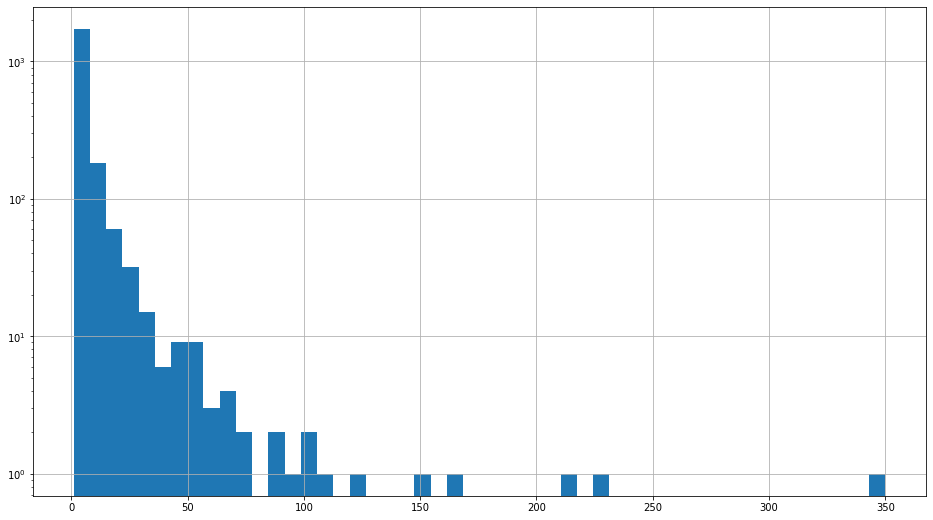

In [67]:
plt.figure(figsize=(16, 9))
plt.yscale('log')
filtered_words_df["count"].hist(bins=50)

<AxesSubplot:>

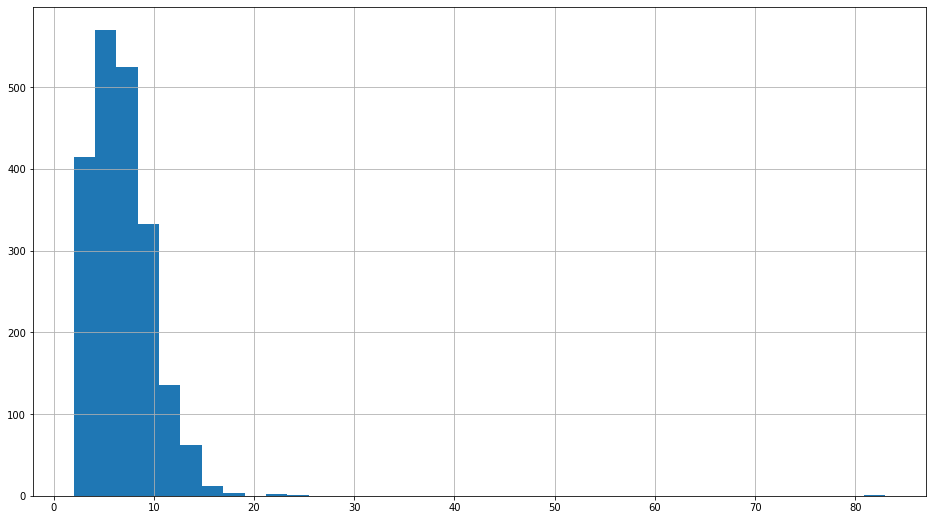

In [68]:
plt.figure(figsize=(16, 9))
#plt.yscale('log')
filtered_words_df["length"].hist(bins=38)

<AxesSubplot:ylabel='count'>

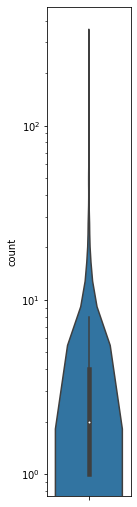

In [69]:
plt.figure(figsize=(1.5, 9))
plt.yscale('log')
sns.violinplot(data=filtered_words_df, y="count")

<AxesSubplot:ylabel='length'>

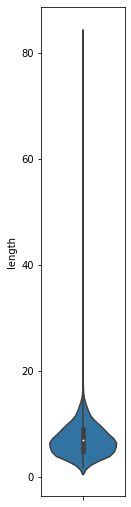

In [70]:
plt.figure(figsize=(1.5, 9))
#plt.yscale('log')
sns.violinplot(data=filtered_words_df, y="length")

In [71]:
filtered_words_df.loc[(filtered_words_df["count"] > 30) & (filtered_words_df["length"] > 5)].sort_values(by=["count"], ascending=False)

,word,count,length,is_word
0,zuckerberg,231,10,False
66,facebook,211,8,False
146,people,167,6,True
496,senator,150,7,True
184,information,103,11,True
232,service,72,7,True
433,content,54,7,True
489,control,52,7,True
189,company,50,7,True
39,privacy,50,7,True


In [73]:
filtered_words_df.loc[(filtered_words_df["count"] > 30) & (filtered_words_df["length"] > 2)].sort_values(by=["count"], ascending=False)

,word,count,length,is_word
0,zuckerberg,231,10,False
66,facebook,211,8,False
146,people,167,6,True
496,senator,150,7,True
42,data,126,4,True
684,think,107,5,True
184,information,103,11,True
106,make,96,4,True
40,use,89,3,True
341,want,87,4,True


In [74]:
filtered_words_df.loc[(filtered_words_df["is_word"] == False) & (filtered_words_df["length"] > 2) & (filtered_words_df["count"] > 30)].sort_values(by="count", ascending=False)


,word,count,length,is_word
0,zuckerberg,231,10,False
66,facebook,211,8,False
187,users,54,5,False
190,cambridge,47,9,False
191,analytica,44,9,False
427,ads,36,3,False
180,app,32,3,False


In [75]:
filtered_words_df.loc[(filtered_words_df["count"] > 30) & (filtered_words_df["length"] > 5)].sort_values(by="count", ascending=False)


,word,count,length,is_word
0,zuckerberg,231,10,False
66,facebook,211,8,False
146,people,167,6,True
496,senator,150,7,True
184,information,103,11,True
232,service,72,7,True
433,content,54,7,True
489,control,52,7,True
189,company,50,7,True
39,privacy,50,7,True


## Text Summarization

In [76]:
def get_word_freq(corpus):
    word_freq_matrix = {}
    
    for sentence in corpus:
        word_frequency = {}

        words = txt.word_tokenizer(sentence)
        n_words = len(words)
        words = txt.word_lemmatizer(words)

        for word in words:
            if word not in txt.stops:
                if word in word_frequency.keys():
                    word_frequency[word] += 1
                else:
                    word_frequency[word] = 1
            
        word_freq_matrix[hash(sentence)]  = word_frequency
    
    return word_freq_matrix

In [77]:
def get_docs_per_word(word_freq_matrix):
    docs_per_word = {}
    
    for key, word_frequency in word_freq_matrix.items():
        for word, count in word_frequency.items():
            if word in docs_per_word:
                docs_per_word[word] += 1
            else:
                docs_per_word[word] = 1
    
    return docs_per_word

In [78]:
def get_tf_matrix(word_freq_matrix):
    tf_matrix = {}
    
    for key, word_frequency in word_freq_matrix.items():
        tf = {}
        
        n_words = len(word_frequency)
        for word, count in word_frequency.items():
            tf[word] = count/n_words
            
        tf_matrix[key] = tf
    
    return tf_matrix

In [79]:
def get_idf_matrix(word_freq_matrix, docs_per_word, n_docs):
    idf_matrix = {}
    
    for key, word_frequency in word_freq_matrix.items():
        idf = {}
        
        for word in word_frequency.keys():
            idf[word] = math.log10(n_docs/(float(docs_per_word[word]) + 1))
        
        idf_matrix[key] = idf
    
    return idf_matrix

In [80]:
def get_tf_idf_matrix(tf_matrix, idf_matrix):
    tf_idf_matrix = {}

    for (key1, word_freq1), (key2, word_freq2) in zip(tf_matrix.items(), idf_matrix.items()):

        tf_idf = {}

        for (word1, tf), (word2, idf) in zip(word_freq1.items(),
                                                    word_freq2.items()):
            tf_idf[word1] = float(tf * idf)

        tf_idf_matrix[key1] = tf_idf
    
    return tf_idf_matrix

In [81]:
def get_sentence_score(tf_idf_matrix):
    sentence_score = {}
    
    for key, val_dict in tf_idf_matrix.items():
        score = 0
        for word, tf_idf in val_dict.items():
            score += tf_idf
            
        sentence_score[key] = score
    
    #print(sentence_score)
    return sentence_score

In [82]:
def get_summary(n_sentences_to_retain, corpus):
    
    n_docs = len(corpus)
    
    word_freq_matrix = get_word_freq(corpus)
    docs_per_word = get_docs_per_word(word_freq_matrix)

    tf_matrix = get_tf_matrix(word_freq_matrix)
    idf_matrix = get_idf_matrix(word_freq_matrix, docs_per_word, n_docs)
    tf_idf_matrix = get_tf_idf_matrix(tf_matrix, idf_matrix)

    sentence_scores = get_sentence_score(tf_idf_matrix)

    top_n = heapq.nlargest(n_sentences_to_retain, sentence_scores, key=sentence_scores.get)
    #print(top_n)
    
    summary = []
    for sentence in corpus:
        if hash(sentence) in top_n:
            #print(sentence_scores[hash(sentence)])
            summary.append(sentence)
            #print(sentence + '\n_______________')
        else:
            pass
    
    return summary

In [37]:
def get_percentage_to_retain():
    try:
        return int(input("Enter Percentage to Retain(0-100): "))
    except Exception as e:
        print(e)
        return get_percentage_to_retain()

In [38]:
percentage_to_retain = get_percentage_to_retain()

Enter Percentage to Retain(0-100): santa
invalid literal for int() with base 10: 'santa'
Enter Percentage to Retain(0-100): 20


In [39]:
n_sentences_to_retain = int((percentage_to_retain * len(corpus))/100)

In [40]:
summary = get_summary(n_sentences_to_retain, corpus)

NameError: name 'get_summary' is not defined

In [ ]:
print(" ".join(summary))